In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

In [2]:
# !pip install shap --user

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: [Monday, Mar 10, 11:59 pm](https://github.com/UBC-CS/cpsc330-2024W2?tab=readme-ov-file#deliverable-due-dates-tentative)**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W2/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W2/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

In [ ]:
import pandas as pd
final = {
    'Final test score': [0.8163],
    'Test Precision': [0.6270],
    'Test Recall': [0.3737],
    'Test F1 Score': [0.4683],
    'Test ROC-AUC': [0.6561],
}
pd.DataFrame(final).T

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [3]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
    cross_val_predict
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
import seaborn as sns

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_Type your answer here, replacing this text._

1. Choice : option 1 
2. This dataset contains information about credit card clients, including personal details like gender, education level, marital status, and age, as well as financial data such as credit limits, payment history, bill statements, and previous payments.

Here’s a breakdown of some key features:

 - LIMIT_BAL refers to the total credit limit in NT dollars.
 - PAY_0 to PAY_6 indicate the repayment status from April to September 2005, where values range from -2 (no consumption) to positive numbers indicating payment delays (e.g., 1 = one-month delay, 2 = two-month delay, etc.).
 - BILL_AMT1 to BILL_AMT6 show the amount of the bill statement for each of those months.
 - PAY_AMT1 to PAY_AMT6 represent the amounts of payments made in the same period.
   
The goal is to predict whether a client will default on their credit card payments. To do this, we can use supervised machine learning models, leveraging the dataset's features. However, since there are many variables, a good first step would be to filter out irrelevant features or identify the ones that have the strongest impact on predicting default risk.

<!-- END QUESTION -->

<br><br>

In [4]:
credit_card_df = pd.read_csv('data/UCI_Credit_Card.csv')
credit_card_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [5]:
train_df, test_df = train_test_split(credit_card_df, test_size = 0.3, random_state = 123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   2100

We can see from the description above, all data are numeric data and there are no null data

In [7]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,14962.348238,167880.651429,1.600762,1.852143,1.554000,35.500810,-0.015429,-0.137095,-0.171619,-0.225238,...,43486.610905,40428.518333,38767.202667,5673.585143,5.895027e+03,5311.432286,4774.021381,4751.850095,5237.762190,0.223238
std,8650.734050,130202.682167,0.489753,0.792961,0.521675,9.212644,1.120465,1.194506,1.196123,1.168556,...,64843.303993,61187.200817,59587.689549,17033.241454,2.180143e+04,18377.997079,15434.136142,15228.193125,18116.846563,0.416427
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-50616.000000,-61372.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7498.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2293.750000,1739.500000,1215.750000,1000.000000,8.200000e+02,390.000000,266.000000,234.000000,110.750000,0.000000
50%,14960.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19102.500000,18083.000000,16854.500000,2100.000000,2.007000e+03,1809.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22458.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54763.250000,50491.000000,49253.750000,5007.250000,5.000000e+03,4628.500000,4021.250000,4016.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


The range of the data is quite different, like for sex or education column the value is around 2 while for LIMIT_BAL it is more than 150000, we will have to apply scaling on this data 

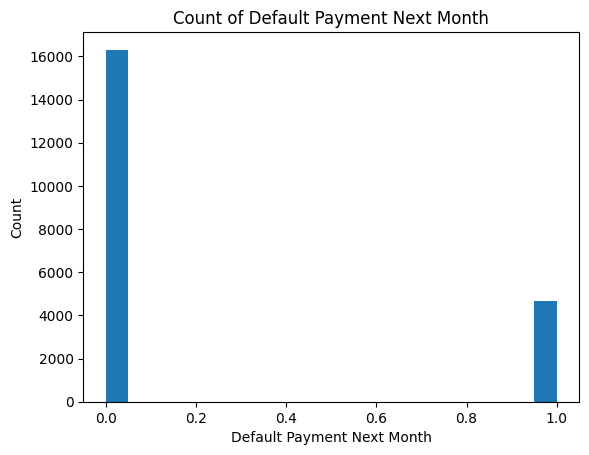

In [8]:
plt.hist(train_df['default.payment.next.month'], bins = 20)
plt.xlabel('Default Payment Next Month')
plt.ylabel('Count')
plt.title('Count of Default Payment Next Month')
plt.show()

In [9]:
train_df['default.payment.next.month'].value_counts(normalize = True)

default.payment.next.month
0    0.776762
1    0.223238
Name: proportion, dtype: float64

We can see that there is huge class imbalance in the default payment next month column between 0 and 1 with number 0s more than 3 times number of 1s 


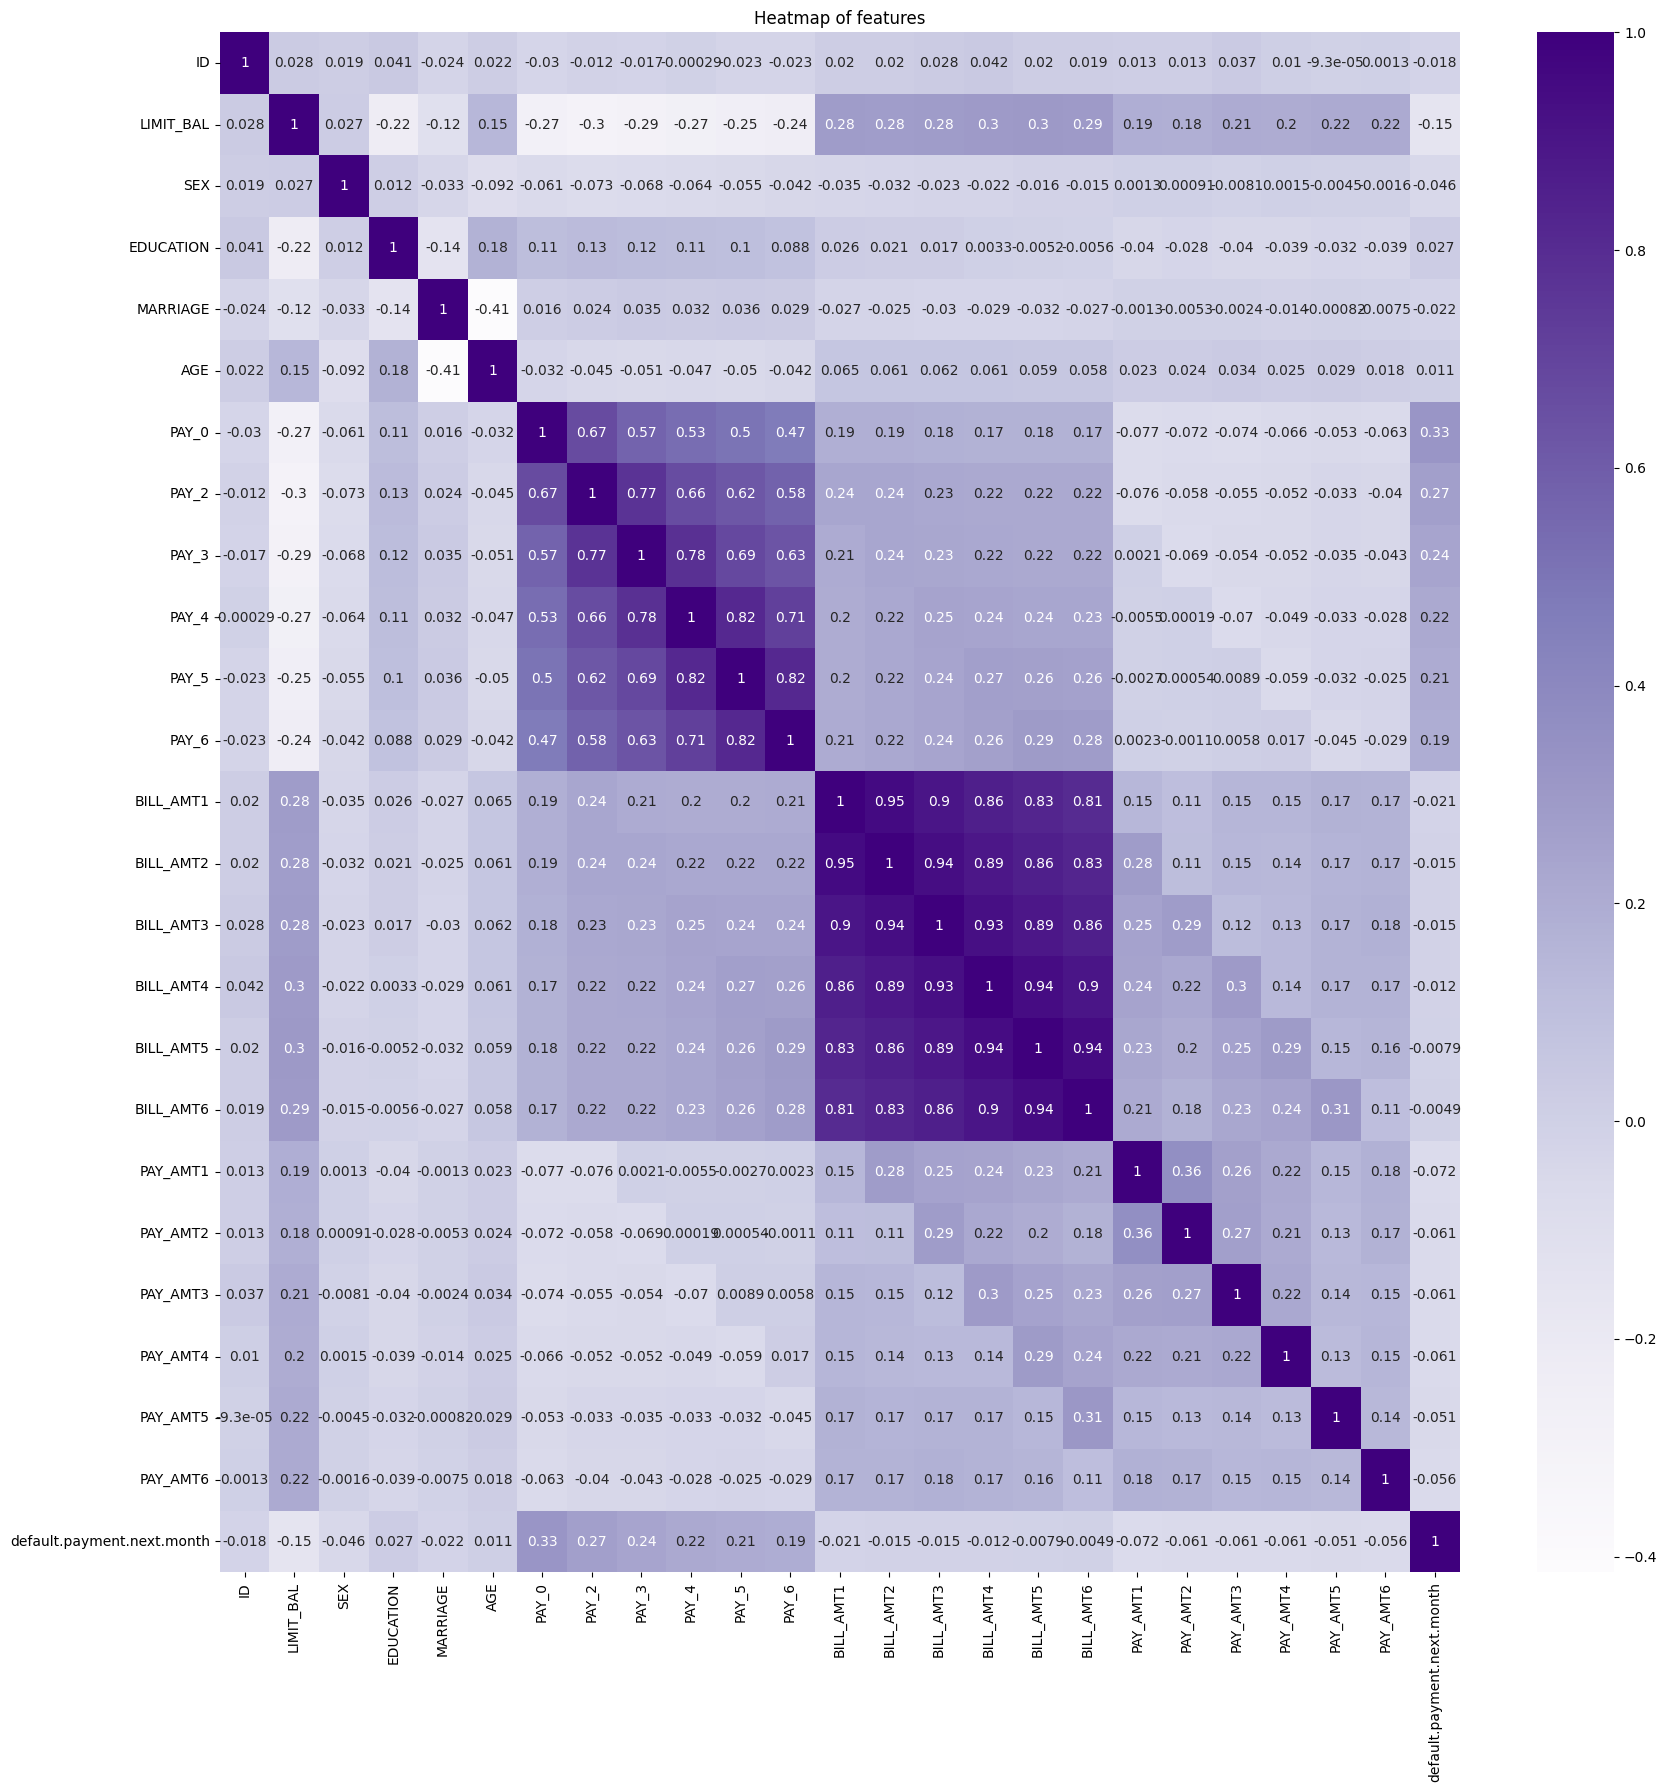

In [10]:
cor = train_df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(cor, annot = True, cmap = plt.cm.Purples)
plt.title('Heatmap of features')
plt.show()

We create a heatmap to see how the features related to each other and how they related to the default. From the heatmap we can see, 
the features that related most to the target（default payment next month) is PAY_0,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6 with PAY_0 is the highest


All features in the dataset are numerical, with no missing values. However, the features have varying scales, which could impact analysis and modeling. The target variable (default payment) is class imbalanced, with 77.7% of clients not defaulting and only 22.3% defaulting. This aligns with real-world scenarios, where most people manage to make their credit card payments. Among all features, repayment status over the past six months shows the strongest correlation with defaulting behavior.

Based on the dataset's documentation:

 - SEX is a binary feature.
 - MARRIAGE, PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, and PAY_6 are categorical features represented as integers.
 - EDUCATION can be considered an ordinal feature due to its ordered nature.
Since identifying clients who default on payments is crucial, handling class imbalance is essential. Accuracy alone is not a reliable metric, as it may be misleading due to the imbalance. Instead, I will use precision, recall, F1-score, and ROC-AUC for evaluation. These metrics provide better insight into model performance, particularly when dealing with imbalanced data.








<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [11]:
...
train_df['LIMIT_BAL'].unique()

array([ 320000.,  440000.,  160000.,  120000.,   50000.,  290000.,
         30000.,  200000.,  220000.,  300000.,   80000.,  190000.,
        130000.,   10000.,  100000.,   90000.,   20000.,  500000.,
        170000.,  400000.,  180000.,   70000.,  310000.,  140000.,
        280000.,   60000.,  150000.,  480000.,  260000.,  210000.,
        330000.,  240000.,  230000.,  430000.,  360000.,  110000.,
        390000.,  470000.,  270000.,  490000.,  380000., 1000000.,
        450000.,   40000.,  340000.,  250000.,  410000.,  370000.,
        550000.,  460000.,  350000.,  420000.,  510000.,  680000.,
        710000.,  530000.,  600000.,  590000.,  650000.,  700000.,
        540000.,  660000.,  630000.,  640000.,  520000.,  560000.,
        760000.,  570000.,  610000.,  720000.,  670000.,  580000.,
        730000.,  780000.,  750000.,  620000.,  690000.,   16000.,
        800000.,  327680.])

In [12]:
print(train_df['SEX'].unique())
print(train_df['SEX'].dtype)

[2 1]
int64


In [13]:
print(train_df['EDUCATION'].unique())
print(train_df['EDUCATION'].dtype)

[1 3 2 5 4 6 0]
int64


In [14]:
print(train_df['MARRIAGE'].unique())
print(train_df['MARRIAGE'].dtype)

[2 1 3 0]
int64


In [15]:
print(train_df['AGE'].unique())
print(train_df['AGE'].dtype)

[36 30 44 54 37 24 56 26 49 33 25 35 40 31 38 39 46 52 27 29 51 32 50 28
 23 48 69 42 47 45 57 34 22 41 53 55 59 62 43 61 58 60 66 65 21 64 67 70
 63 68 72 75 79 73 74 71]
int64


In [16]:
# we dont do this for PAY_2 to PAY_6 since they are basically the same
print(train_df['PAY_0'].unique())
print(train_df['PAY_0'].dtype)

[ 0 -1 -2  1  2  3  5  8  7  4  6]
int64


In [17]:
# we dont do this for PAY_2 to PAY_6 since they are basically the same
print(train_df['BILL_AMT1'].unique())
print(train_df['BILL_AMT1'].dtype)

[ 2.9026e+04  7.7700e+02 -1.8000e+01 ...  1.3415e+04  4.7194e+04
  2.8409e+04]
float64


Based on our analysis in Part 3 and the value_counts() results above, we can classify the feature types and determine the appropriate transformations for each:

 - ID: Numeric data, but not useful for prediction, so we drop it.
 - LIMIT_BAL: Numeric feature with large values, requiring scaling.
 - SEX: Binary categorical feature represented numerically; no transformation needed.
 - EDUCATION: Ordinal categorical feature represented numerically; no transformation needed.
 - MARRIAGE: Categorical feature represented numerically; no transformation needed.
 - AGE: Numeric feature with reasonable values, but scaling is applied to maintain consistency across features.
 - PAY_0 - PAY_6: Categorical features represented numerically; no transformation needed.
 - BILL_AMT1 - BILL_AMT6, PAY_AMT1 - PAY_AMT6: Numeric features with large values, requiring scaling.

<!-- END QUESTION -->

<br><br>

In [18]:
X_train, y_train = train_df.drop(columns = ['default.payment.next.month']), train_df['default.payment.next.month']
X_test, y_test = test_df.drop(columns = ['default.payment.next.month']), test_df['default.payment.next.month']
numeric_features = [
    'LIMIT_BAL', 
    'AGE', 
    'BILL_AMT1', 
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]

passthrough_features = [
    'SEX',
    'EDUCATION',
    'MARRIAGE',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
]

drop_features = ['ID']

In [19]:
# 0, 6, 5, 4 , 3, 2, 1 ordered by ascending
education_levels = ['0', '6', '5', '4', '3', '2', '1']

In [20]:
ct = make_column_transformer(
    (StandardScaler(), numeric_features),
    ('passthrough', passthrough_features),
    ('drop', drop_features),
)


In [78]:
X_train_transformed = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

In [22]:
column_names = (numeric_features + passthrough_features)


In [23]:
pd.DataFrame(X_train_transformed, columns = column_names).head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1.168355,0.054187,-0.300665,-0.293394,-0.265310,-0.371930,-0.494781,-0.587035,-0.039546,-0.040229,...,0.097991,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.090017,-0.597108,-0.685307,-0.679495,0.585444,1.970295,1.805461,1.327534,-0.297166,3.739796,...,2.562606,2.0,1.0,2.0,-1.0,-1.0,-1.0,0.0,0.0,0.0
2,-0.060527,0.922579,-0.696132,-0.688319,-0.681234,-0.670935,-0.661045,-0.650908,-0.333097,-0.270403,...,-0.289117,2.0,3.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
3,-0.367748,-0.597108,0.687456,0.752583,0.835581,0.918719,0.501203,0.144527,-0.115517,-0.018028,...,-0.195169,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905384,2.008070,-0.040230,-0.031399,-0.287429,-0.245237,-0.204599,-0.191104,-0.333097,-0.206185,...,-0.206319,1.0,2.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0


<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [24]:
dummy = DummyClassifier(strategy = 'most_frequent')
score = cross_validate(dummy, X_train_transformed, y_train, return_train_score = True)
pd.DataFrame(score)

,fit_time,score_time,test_score,train_score
0,0.002000,0.001001,0.776905,0.776726
1,0.001000,0.001000,0.776905,0.776726
2,0.002008,0.000000,0.776667,0.776786
3,0.001000,0.001000,0.776667,0.776786
4,0.000992,0.001007,0.776667,0.776786


The result is 77% which is the ratio of the class imbalance we mention earlier, the model just pick which ever have higher ratio

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

For this problem, we use logistic regression. The following snippet of code is to hyperparameter tuning with different C values

In [25]:

scores_dict = {
    'C' : 10.0 ** np.arange(-4, 6, 1),
    'mean_fit_time': list(),
    'mean_score_time': list(),
    'mean_train_scores': list(),
    'mean_cv_scores': list(),
    'cv_std_scores': list(),
}

for C in scores_dict['C']:
    lr = LogisticRegression(C = C)
    scores = cross_validate(lr, X_train_transformed, y_train, return_train_score = True)
    scores_dict['mean_fit_time'].append(scores['fit_time'].mean())
    scores_dict['mean_score_time'].append(scores['score_time'].mean())
    scores_dict['mean_train_scores'].append(scores['train_score'].mean())
    scores_dict['mean_cv_scores'].append(scores['test_score'].mean())
    scores_dict['cv_std_scores'].append(scores['test_score'].std())

results_df = pd.DataFrame(scores_dict)
results_df

,C,mean_fit_time,mean_score_time,mean_train_scores,mean_cv_scores,cv_std_scores
0,0.0001,0.024621,0.001791,0.780179,0.780095,0.000959
1,0.0010,0.040721,0.001604,0.801738,0.801905,0.003148
2,0.0100,0.045932,0.001176,0.809107,0.808857,0.002392
3,0.1000,0.052277,0.001199,0.810024,0.809762,0.002198
4,1.0000,0.050998,0.001000,0.810155,0.809952,0.002320
5,10.0000,0.051192,0.001205,0.810179,0.810048,0.002200
6,100.0000,0.055606,0.001400,0.810179,0.810095,0.002237
7,1000.0000,0.046956,0.000995,0.810190,0.810095,0.002237
8,10000.0000,0.057346,0.001003,0.810190,0.810095,0.002237
9,100000.0000,0.049422,0.001232,0.810190,0.810095,0.002237


From the results above, we can observe that as C increases, the model's complexity also increases. A smaller C can result in underfitting, while a larger C may lead to overfitting. Our goal is to find the optimal balance.

At C = 10, 10,000, and 100,000, the mean cross-validation score remains consistent at 0.81 . However, at C = 100, the training score is relatively lower then C = 10, suggesting better generalization. Based on this, we can conclude that C = 100 is the ideal choice for our model, serving as the best hyperparameter.

Using the best hyperparameter C = 100 to our model

In [26]:
lr = LogisticRegression(C = 1.0)
scoring = ['roc_auc']
scores_train = cross_validate(lr, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores_train).mean()

fit_time        0.046877
score_time      0.002199
test_roc_auc    0.722382
dtype: float64

In [27]:
scores_test = cross_validate(lr, X_test_transformed, y_test, scoring = scoring)
pd.DataFrame(scores_test).mean()

fit_time        0.022705
score_time      0.001800
test_roc_auc    0.722390
dtype: float64

In [28]:
predictions = cross_val_predict(lr, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8175    0.9725    0.8883     16312
           1     0.7185    0.2445    0.3648      4688

    accuracy                         0.8100     21000
   macro avg     0.7680    0.6085    0.6265     21000
weighted avg     0.7954    0.8100    0.7714     21000



The model performs well in terms of precision for both class 0 and class 1. However, while it achieves a high recall and F1-score for class 0, its recall and F1-score for class 1 are quite low. This indicates that the model fails to correctly identify many actual class 1 instances. The ROC-AUC score is 0.722, which is better than random guessing (0.5), but there is still room for improvement.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

**Model 1 : Decision Tree**

In [29]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
scores = cross_validate(decision_tree, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.421787,0.002993,0.709048,0.999405
1,0.451825,0.001001,0.736429,0.999464
2,0.495490,0.002102,0.728571,0.999405
3,0.483170,0.001932,0.721190,0.999226
4,0.432114,0.003003,0.722857,0.999524


Since train score is nearly perfect, the decision tree is overfitting which is clearly worse than the linear models. But maybe due to not approriate max_depth, we can try to hyperparameter tuning max_depth to see if it is really bad

In [30]:

from sklearn.tree import DecisionTreeClassifier
results_dict = {
    "depth": [],
    "mean_fit_time": [],
    "mean_score_time": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"max_depth": np.arange(1, 16)}

for depth in param_grid["max_depth"]:
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_validate(model, X_train_transformed, y_train, cv=10, return_train_score=True)
    results_dict["depth"].append(depth)
    results_dict["mean_fit_time"].append(np.mean(scores["fit_time"]))
    results_dict["mean_score_time"].append(np.mean(scores["score_time"]))
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df = results_df.set_index("depth")
results_df

,mean_fit_time,mean_score_time,mean_train_score,mean_cv_score,std_cv_score,std_train_score
depth,,,,,,
1,0.030153,0.001194,0.818381,0.818381,0.008457,0.000940
2,0.053963,0.000916,0.818762,0.818524,0.008177,0.001059
3,0.081901,0.001207,0.821709,0.820810,0.007836,0.000851
4,0.110042,0.000901,0.823180,0.821381,0.007656,0.000744
5,0.128516,0.001202,0.824931,0.819476,0.006492,0.000975
6,0.164552,0.001203,0.828201,0.818714,0.007172,0.000900
7,0.183872,0.001400,0.832683,0.815952,0.007156,0.001163
8,0.200812,0.000993,0.837661,0.814857,0.006127,0.001301
9,0.236781,0.001265,0.844032,0.811810,0.006635,0.001506


max_depth 4 is the one with highest cross validation sccore so it seems like a good choice

In [31]:
best_decision_tree = DecisionTreeClassifier(max_depth = 4)
predictions = cross_val_predict(best_decision_tree, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8384    0.9506    0.8910     16312
           1     0.6786    0.3626    0.4727      4688

    accuracy                         0.8194     21000
   macro avg     0.7585    0.6566    0.6819     21000
weighted avg     0.8028    0.8194    0.7976     21000



In [32]:
scoring = ['accuracy', 'roc_auc']
scores = cross_validate(best_decision_tree, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time         0.104161
score_time       0.004787
test_accuracy    0.819333
test_roc_auc     0.737561
dtype: float64

The DecisionTreeClassifier() shows signs of overfitting when max_depth is large, as the training score approaches 1. Conversely, when max_depth is too small, the model underfits, with the training and cross-validation scores being nearly identical. After evaluation, max_depth = 4 is chosen as the optimal hyperparameter. 

Comparison with the Linear Model
 - Accuracy: Decision tree (0.819) slightly outperforms the linear model (0.810).
 - Precision on class 1: The linear model (0.7185) is better than the decision tree (0.6786).
 - Recall on class 1: The decision tree (0.362) performs better than the linear model (0.244).
 - F1-score on class 1: The decision tree (0.472) outperforms the linear model (0.365).
 - ROC-AUC score: Decision tree (0.737) is slightly better than the linear model (0.722).
 - Fitting time: The decision tree slower with (0.126s) and the linear model at (0.02s).
 - Scoring time: The linear model (0.002s) runs faster than the decision tree (~0.004s).
Conclusion
 - With the best hyperparameter, the decision tree model outperforms the logistic regression model in most evaluation metrics. However, in terms of fitting time and scoring time, logistic regression remains the faster option.

**Model 2 : Ensemble Model Random Forest()**


In [33]:
rf = RandomForestClassifier(random_state = 123, n_jobs = -1)

In [34]:
scores = cross_validate(rf, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.453774,0.032574,0.810476,0.999405
1,0.446438,0.031611,0.812619,0.999405
2,0.459748,0.033271,0.820952,0.999345
3,0.448325,0.033559,0.822381,0.999226
4,0.458991,0.045959,0.812381,0.999524


In [35]:
predictions = cross_val_predict(rf, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8401    0.9422    0.8882     16312
           1     0.6514    0.3759    0.4767      4688

    accuracy                         0.8158     21000
   macro avg     0.7457    0.6590    0.6824     21000
weighted avg     0.7979    0.8158    0.7963     21000



In [36]:
scoring = ['accuracy', 'roc_auc']
scores = cross_validate(rf, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time         0.468042
score_time       0.078562
test_accuracy    0.815762
test_roc_auc     0.762135
dtype: float64

The RandomForestClassifier() consistently achieves an almost perfect training score across all cross-validations. However, we do not consider this overfitting, as increasing model complexity does not cause a drop in cross-validation performance. It is also clearly not underfitting.


Comparison with the Linear Model
 - Accuracy: Random forest  slightly outperforms the linear model .
 - Precision on class 1: The linear model  is better than the random forest .
 - Recall on class 1: The random forest  outperforms the linear model .
 - F1-score on class 1: The random forest is better than the linear model .
 - ROC-AUC score: The random forest  surpasses the linear model .
 - Fitting time: The linear model is much faster than the random forest .
 - Scoring time: The linear model is significantly faster than the random forest .

   
Conclusion
The random forest model performs better than logistic regression in most evaluation metrics. However, when it comes to speed, the linear model is much more efficient in both fitting and scoring time.

**Model 3: KNN Classifier**

In [37]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
scores = cross_validate(knn, X_train_transformed, y_train, return_train_score=True)
pd.DataFrame(scores)

,fit_time,score_time,test_score,train_score
0,0.003999,0.252668,0.731429,0.999405
1,0.002085,0.059516,0.725000,0.999464
2,0.002997,0.058543,0.730714,0.999405
3,0.003008,0.056673,0.723333,0.999226
4,0.003009,0.065655,0.727619,0.999524


In [38]:

results_dict = {
    "n_neighbors": [],
    "mean_fit_time": [],
    "mean_score_time": [],
    "mean_train_score": [],
    "mean_cv_score": [],
    "std_cv_score": [],
    "std_train_score": [],
}
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

for k in param_grid["n_neighbors"]:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_validate(knn, X_train_transformed, y_train, return_train_score=True)
    results_dict["n_neighbors"].append(k)
    results_dict["mean_fit_time"].append(np.mean(scores["fit_time"]))
    results_dict["mean_score_time"].append(np.mean(scores["score_time"]))
    results_dict["mean_cv_score"].append(np.mean(scores["test_score"]))
    results_dict["mean_train_score"].append(np.mean(scores["train_score"]))
    results_dict["std_cv_score"].append(scores["test_score"].std())
    results_dict["std_train_score"].append(scores["train_score"].std())

results_df = pd.DataFrame(results_dict)
results_df

,n_neighbors,mean_fit_time,mean_score_time,mean_train_score,mean_cv_score,std_cv_score,std_train_score
0,1,0.002398,0.059252,0.999405,0.727619,0.003141,0.000100
1,6,0.002454,0.065211,0.835643,0.804048,0.001923,0.002006
2,11,0.002430,0.073208,0.828333,0.810571,0.006802,0.001007
3,16,0.002601,0.082134,0.823964,0.812333,0.003006,0.000596
4,21,0.002205,0.090355,0.821488,0.811714,0.003328,0.000921
5,26,0.002399,0.099040,0.819571,0.811381,0.002023,0.001088
6,31,0.002584,0.111560,0.818595,0.811762,0.003221,0.000811
7,36,0.002607,0.116244,0.817643,0.812333,0.003113,0.001311
8,41,0.002706,0.123933,0.817440,0.812143,0.003261,0.001223
9,46,0.002400,0.133014,0.816952,0.812667,0.004161,0.001380


From the results above, the highest mean cross-validation score occurs at n_neighbors = 46. However, its mean training score (0.816952) is very close to its mean cross-validation score (0.812619). Since larger values of n_neighbors typically lead to underfitting, the model at n_neighbors = 46 is likely underfitting.

On the other hand, when n_neighbors = 16, the mean cross-validation score (0.81228) is the third highest, and there is a reasonable gap between the training score and the cross-validation score, indicating a better balance between bias and variance. Therefore, we select n_neighbors = 16 as the best hyperparameter.

Use the best hyperparameter for our model

In [39]:
best_knn = KNeighborsClassifier(n_neighbors = 16)
predictions = cross_val_predict(best_knn, X_train_transformed, y_train)
cm_dict = print(classification_report(y_train, predictions, target_names=["0", "1"], digits=4))

              precision    recall  f1-score   support

           0     0.8320    0.9503    0.8872     16312
           1     0.6578    0.3321    0.4414      4688

    accuracy                         0.8123     21000
   macro avg     0.7449    0.6412    0.6643     21000
weighted avg     0.7931    0.8123    0.7877     21000



In [40]:
scoring = ['accuracy', 'roc_auc']
scores = cross_validate(best_knn, X_train_transformed, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time         0.002598
score_time       0.165005
test_accuracy    0.812333
test_roc_auc     0.744715
dtype: float64

The KNeighborsClassifier() tends to overfit when the number of neighbors is small, as the training score approaches perfection. Conversely, when the number of neighbors is large, the model underfits, with training and cross-validation scores becoming nearly identical.

In terms of computational efficiency, the fitting time remains consistent across different neighbor values, while scoring time increases as the number of neighbors grows. After evaluation, the best hyperparameter is selected based on performance and generalization.

Comparison with the Linear Model
 - Accuracy: KNN performs slightly better than the linear model.
 - Precision on class 1: The linear model outperforms KNN.
 - Recall on class 1: KNN performs better than the linear model.
 - F1-score on class 1: KNN has a higher F1-score than the linear model.
 - ROC-AUC score: KNN achieves a better score than the linear model.
 - Fitting time: KNN is faster than the linear model.
 - Scoring time: The linear model is significantly faster than KNN.
   
Conclusion
With the optimal hyperparameter, KNN outperforms the linear model in most evaluation metrics. However, while KNN is faster in training, the linear model remains superior in scoring speed.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

In [41]:
...

Ellipsis

In [42]:
...

Ellipsis

In [43]:
...

Ellipsis

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

**Logistic Regression**

In [44]:
lr = LogisticRegression()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1.0, 10, 100, 1000]
}

grid_search = GridSearchCV(
    lr, param_grid, n_jobs = -1, cv = 5, return_train_score = True, 
)

grid_search.fit(X_train_transformed, y_train)
pd.DataFrame(grid_search.cv_results_).set_index('rank_test_score').sort_index().T

rank_test_score,1,1,3,4,5,6,7
mean_fit_time,0.09497,0.054224,0.044573,0.068114,0.081672,0.078557,0.043954
std_fit_time,0.013281,0.008378,0.008595,0.015129,0.017916,0.015709,0.009309
mean_score_time,0.001183,0.000802,0.000822,0.001422,0.001399,0.002109,0.001782
std_score_time,0.00041,0.000401,0.000785,0.000404,0.000799,0.000382,0.000744
param_C,1000.0,100.0,10.0,1.0,0.1,0.01,0.001
params,{'C': 1000},{'C': 100},{'C': 10},{'C': 1.0},{'C': 0.1},{'C': 0.01},{'C': 0.001}
split0_test_score,0.809524,0.809524,0.809524,0.80881,0.80881,0.80881,0.802619
split1_test_score,0.809286,0.809286,0.809286,0.809286,0.809048,0.80881,0.80381
split2_test_score,0.811905,0.811905,0.811667,0.811667,0.81119,0.81119,0.804286
split3_test_score,0.813095,0.813095,0.813095,0.813333,0.813095,0.810952,0.803095


In [45]:
relevant = [
    'mean_test_score',
    'param_C',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(grid_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T


rank_test_score,1,1,3,4,5,6,7
mean_test_score,0.810095,0.810095,0.810048,0.809952,0.809762,0.808857,0.801905
param_C,1000.000000,100.000000,10.000000,1.000000,0.100000,0.010000,0.001000
mean_fit_time,0.094970,0.054224,0.044573,0.068114,0.081672,0.078557,0.043954
std_test_score,0.002237,0.002237,0.002200,0.002320,0.002198,0.002392,0.003148


In [46]:
best_params = grid_search.best_params_
best_params

{'C': 100}

gridSearch return the best C is 100 which was similar to our choice

**Decision Tree**

In [47]:
decision_tree = DecisionTreeClassifier()
param_grid = {"max_depth": np.arange(1, 16)}

random_search = RandomizedSearchCV(
    decision_tree, param_grid, n_jobs = -1, n_iter = 10, random_state = 123, 
)

random_search.fit(X_train_transformed, y_train)
pd.DataFrame(random_search.cv_results_).set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_fit_time,0.086853,0.045928,0.037075,0.129596,0.147926,0.200684,0.189013,0.219644,0.241866,0.197829
std_fit_time,0.003029,0.002857,0.00309,0.008052,0.003604,0.009728,0.013586,0.00844,0.006556,0.009141
mean_score_time,0.001101,0.000901,0.002071,0.0012,0.0011,0.001155,0.001,0.0011,0.0011,0.000721
std_score_time,0.000201,0.000199,0.000956,0.0004,0.000201,0.000431,0.000632,0.000664,0.000201,0.000374
param_max_depth,4,2,1,5,6,8,9,10,11,12
params,{'max_depth': 4},{'max_depth': 2},{'max_depth': 1},{'max_depth': 5},{'max_depth': 6},{'max_depth': 8},{'max_depth': 9},{'max_depth': 10},{'max_depth': 11},{'max_depth': 12}
split0_test_score,0.812619,0.811429,0.811905,0.812143,0.808571,0.803571,0.804524,0.797143,0.792619,0.786905
split1_test_score,0.817619,0.815952,0.814762,0.815952,0.816667,0.816905,0.807619,0.808095,0.801429,0.800952
split2_test_score,0.822381,0.82381,0.82381,0.818571,0.820476,0.818095,0.817381,0.814286,0.809048,0.800952
split3_test_score,0.825476,0.824762,0.824762,0.823095,0.820238,0.816667,0.811667,0.806667,0.79881,0.794286


In [48]:
relevant = [
    'mean_test_score',
    'param_max_depth',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(random_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.819333,0.818524,0.818381,0.817286,0.816381,0.814333,0.811333,0.807429,0.801143,0.796571
param_max_depth,4.000000,2.000000,1.000000,5.000000,6.000000,8.000000,9.000000,10.000000,11.000000,12.000000
mean_fit_time,0.086853,0.045928,0.037075,0.129596,0.147926,0.200684,0.189013,0.219644,0.241866,0.197829
std_test_score,0.004373,0.005045,0.005063,0.003578,0.004311,0.005411,0.004775,0.005766,0.005437,0.005426


In [49]:
best_params = random_search.best_params_
best_params

{'max_depth': np.int64(4)}

The best hyperparameter found by random search is max_depth = 4, which is similar to what we found 

**KNN Classifier**

In [50]:
knn = KNeighborsClassifier()
param_grid = {"n_neighbors": np.arange(1, 50, 5)}

random_search = RandomizedSearchCV(
    knn, param_grid, n_jobs = -1, n_iter = 10, random_state = 123, 
)

random_search.fit(X_train_transformed, y_train)
pd.DataFrame(random_search.cv_results_).set_index('rank_test_score').sort_index().T

rank_test_score,1,2,2,4,5,5,7,8,9,10
mean_fit_time,0.004907,0.002803,0.00421,0.022136,0.0025,0.003577,0.003304,0.002601,0.003907,0.003801
std_fit_time,0.001117,0.000508,0.001724,0.034843,0.000448,0.000597,0.000399,0.000489,0.000657,0.000752
mean_score_time,0.655288,0.909567,0.682867,0.73934,0.749449,0.686566,1.098632,0.691235,0.56475,0.742475
std_score_time,0.110975,0.284275,0.141891,0.061452,0.205146,0.182413,0.160784,0.146926,0.130602,0.194986
param_n_neighbors,46,16,36,41,21,31,26,11,6,1
params,{'n_neighbors': 46},{'n_neighbors': 16},{'n_neighbors': 36},{'n_neighbors': 41},{'n_neighbors': 21},{'n_neighbors': 31},{'n_neighbors': 26},{'n_neighbors': 11},{'n_neighbors': 6},{'n_neighbors': 1}
split0_test_score,0.80619,0.81,0.807857,0.806429,0.807143,0.805952,0.807619,0.804762,0.802619,0.731429
split1_test_score,0.81,0.808571,0.81119,0.81119,0.810238,0.811429,0.812381,0.811429,0.802619,0.725
split2_test_score,0.816667,0.81619,0.816429,0.815952,0.814762,0.814762,0.813095,0.813333,0.807857,0.730714
split3_test_score,0.817619,0.815476,0.815238,0.814286,0.816429,0.814762,0.812857,0.82119,0.804524,0.723333


In [51]:
relevant = [
    'mean_test_score',
    'param_n_neighbors',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(random_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T

rank_test_score,1,2,2,4,5,5,7,8,9,10
mean_test_score,0.812619,0.812333,0.812333,0.812143,0.811762,0.811762,0.811381,0.810476,0.804095,0.727619
param_n_neighbors,46.000000,16.000000,36.000000,41.000000,21.000000,31.000000,26.000000,11.000000,6.000000,1.000000
mean_fit_time,0.004907,0.002803,0.004210,0.022136,0.002500,0.003577,0.003304,0.002601,0.003907,0.003801
std_test_score,0.004232,0.003006,0.003113,0.003261,0.003369,0.003221,0.002023,0.006843,0.002011,0.003141


In [52]:
best_params = random_search.best_params_
best_params

{'n_neighbors': np.int64(46)}

The optimized hyperparameter for KNN is n_neighbors = 46, which is not the same as what we found but we also considered 46. In fact it is still a decent choice as parameter since it has highest cross-validation score 

**Random Forest**

In [53]:
rf = RandomForestClassifier(random_state = 123, n_jobs = -1)
param_grid = {
    "n_estimators": np.arange(1, 100, 5),
    "max_depth": np.arange(1, 50),
    "max_features": np.arange(1, 23),
}

random_search = RandomizedSearchCV(
    rf, param_grid, n_jobs = -1, n_iter = 10, random_state = 123, 
)

random_search.fit(X_train_transformed, y_train)
pd.DataFrame(random_search.cv_results_).set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_fit_time,9.904305,13.271557,8.341849,9.363464,9.425553,6.156126,8.374938,10.931433,13.980832,5.558246
std_fit_time,0.324336,3.679249,2.866315,3.317153,0.142007,0.441932,1.963604,2.154492,2.632237,1.880998
mean_score_time,0.465478,5.348347,8.82893,6.113523,1.254604,10.672178,2.331582,6.360603,4.059743,5.327146
std_score_time,0.366416,2.825139,2.710786,1.154285,0.140274,0.155376,1.855004,2.005099,2.791601,2.237564
param_n_estimators,21,86,51,76,66,31,36,26,16,81
param_max_features,20,21,7,12,16,9,15,17,15,5
param_max_depth,13,35,41,31,47,46,47,36,18,1
params,"{'n_estimators': 21, 'max_features': 20, 'max_...","{'n_estimators': 86, 'max_features': 21, 'max_...","{'n_estimators': 51, 'max_features': 7, 'max_d...","{'n_estimators': 76, 'max_features': 12, 'max_...","{'n_estimators': 66, 'max_features': 16, 'max_...","{'n_estimators': 31, 'max_features': 9, 'max_d...","{'n_estimators': 36, 'max_features': 15, 'max_...","{'n_estimators': 26, 'max_features': 17, 'max_...","{'n_estimators': 16, 'max_features': 15, 'max_...","{'n_estimators': 81, 'max_features': 5, 'max_d..."
split0_test_score,0.812143,0.807619,0.804524,0.808333,0.806667,0.805952,0.80381,0.807143,0.79881,0.797143
split1_test_score,0.812143,0.811905,0.815714,0.810952,0.81,0.809286,0.817143,0.808095,0.808571,0.79881


In [54]:
relevant = [
    'mean_test_score',
    'param_n_estimators',
    'param_max_depth',
    'param_max_features',
    'mean_fit_time',
    'rank_test_score',
    'std_test_score',
]
pd.DataFrame(random_search.cv_results_)[relevant].set_index('rank_test_score').sort_index().T

rank_test_score,1,2,3,4,5,6,7,8,9,10
mean_test_score,0.816286,0.814524,0.813857,0.813810,0.813381,0.811905,0.811619,0.811238,0.810714,0.797619
param_n_estimators,21.000000,86.000000,51.000000,76.000000,66.000000,31.000000,36.000000,26.000000,16.000000,81.000000
param_max_depth,13.000000,35.000000,41.000000,31.000000,47.000000,46.000000,47.000000,36.000000,18.000000,1.000000
param_max_features,20.000000,21.000000,7.000000,12.000000,16.000000,9.000000,15.000000,17.000000,15.000000,5.000000
mean_fit_time,9.904305,13.271557,8.341849,9.363464,9.425553,6.156126,8.374938,10.931433,13.980832,5.558246
std_test_score,0.003870,0.004814,0.004746,0.004121,0.004947,0.003961,0.004352,0.003266,0.006610,0.003275


In [55]:
best_params = random_search.best_params_
best_params

{'n_estimators': np.int64(21),
 'max_features': np.int64(20),
 'max_depth': np.int64(13)}

The best hyperparameter is at when n_estimators is 21, max_depth is 13, and max_features is 20

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [107]:
# import shap
# import matplotlib.pyplot as plt

# # Train the Random Forest model inside the pipeline
pipe_rf = make_pipeline(ct,DecisionTreeClassifier(max_depth = 4))
model = pipe_rf.named_steps["decisiontreeclassifier"]

X_train_enc = pd.DataFrame(
    data=X_train_transformed,
    columns=column_names,
    index=X_train.index,
)
X_test_enc = pd.DataFrame(
    data=X_test_transformed,
    columns=column_names,
    index=X_test.index,
)
model.fit(X_train_enc,y_train)

DecisionTreeClassifier(max_depth=4)

In [125]:
y_train[:20]


16395    0
21448    0
20034    0
25755    0
1438     0
13415    0
18011    0
27677    0
11628    0
27103    0
13345    0
9546     0
9527     1
12735    0
9550     0
3834     1
5815     1
15648    0
26889    1
3254     0
Name: default.payment.next.month, dtype: int64

In [110]:
import shap
explainer = shap.TreeExplainer(pipe_rf['decisiontreeclassifier'])
train_shap_values = explainer(X_train_enc) # train shap values
test_shap_values = explainer(X_test_enc) # train shap values

In [105]:
train_shap_values.shape

(21000, 23, 2)

In [106]:
# load JS visualization code to notebook
shap.initjs()

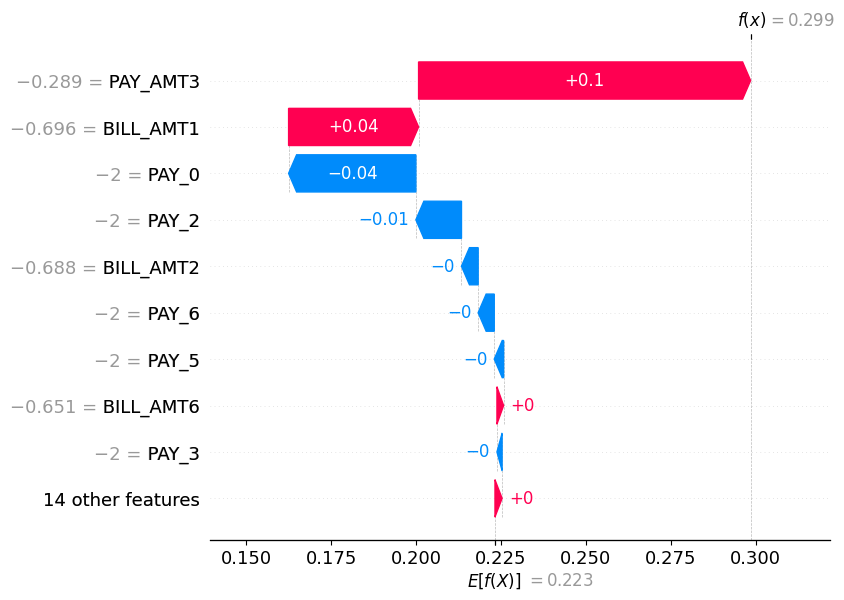

In [127]:
instance_index = 2 #y=0
class_index = 1 

shap_values = train_shap_values[instance_index, :, class_index]


explanation = shap.Explanation(values=shap_values, 
                               base_values=explainer.expected_value[class_index],  # Replace with expected value
                               feature_names=column_names)  # Replace with actual feature names

# Plot waterfall
shap.plots.waterfall(explanation)

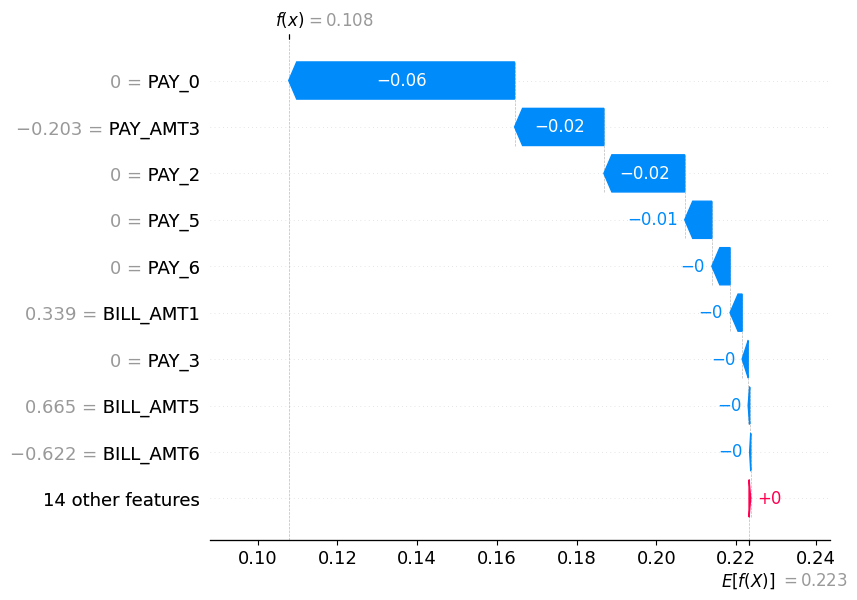

In [126]:
instance_index = 12 #y=1 
class_index = 1 

shap_values = train_shap_values[instance_index, :, class_index]


explanation = shap.Explanation(values=shap_values, 
                               base_values=explainer.expected_value[class_index],  # Replace with expected value
                               feature_names=column_names)  # Replace with actual feature names

# Plot waterfall
shap.plots.waterfall(explanation)

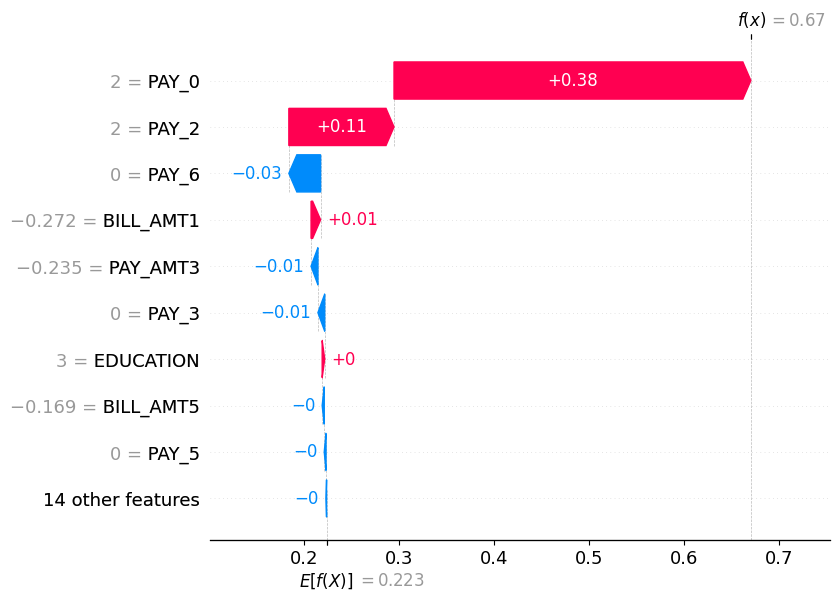

In [129]:
instance_index = 15 #y =1 
class_index = 1

shap_values = train_shap_values[instance_index, :, class_index]


explanation = shap.Explanation(values=shap_values, 
                               base_values=explainer.expected_value[class_index],  # Replace with expected value
                               feature_names=column_names)  # Replace with actual feature names

# Plot waterfall
shap.plots.waterfall(explanation)

According to our SHAP plots, PAY_0 is the most important feature, significantly increasing default probability when high. PAY_2 follows, reinforcing that recent repayment history (August, September) is crucial. Bill amounts (BILL_AMT1, BILL_AMT5) and payment amounts (PAY_AMT3) also influence predictions, while AGE is not among the top features. This highlights that repayment behavior is the strongest predictor of default.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_Type your answer here, replacing this text._

In [133]:
pipe_rf = make_pipeline(ct, RandomForestClassifier(n_estimators = 21, max_depth = 13, max_features = 20, n_jobs = -1, random_state = 123))
pipe_rf.fit(X_train, y_train)
predictions = pipe_rf.predict(X_test)
predictions

array([0, 0, 1, ..., 0, 0, 1])

In [134]:
from sklearn.metrics import roc_auc_score

data = {
    "accuracy": [],
    "error": [],
    "precision": [],
    "recall": [],
    "f1 score": [],
    "roc-auc score": [],
}
data["accuracy"].append(accuracy_score(y_test, predictions))
data["error"].append(1 - accuracy_score(y_test, predictions))
data["precision"].append(
    precision_score(y_test, predictions, zero_division=1)
)
data["recall"].append(recall_score(y_test, predictions))
data["f1 score"].append(f1_score(y_test, predictions))
data["roc-auc score"].append(roc_auc_score(y_test, predictions))
df = pd.DataFrame(data)
df

,accuracy,error,precision,recall,f1 score,roc-auc score
0,0.816333,0.183667,0.627046,0.373717,0.468318,0.656158


In [135]:
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']
scores = cross_validate(pipe_rf, X_train, y_train, scoring = scoring)
pd.DataFrame(scores).mean()

fit_time          0.354042
score_time        0.063775
test_accuracy     0.816429
test_f1           0.473595
test_precision    0.658545
test_recall       0.369881
test_roc_auc      0.769239
dtype: float64

Both test accuracy and validation accuracy is around 0.81, which agrees each other; test precision is 0.62, which is slightly higher than validation precision 0.6585; test recall is 0.3737, which is slightly higher than validation recall 0.37; test f1 score is 0.4683, which is slightly lower than validation f1 score 0.4736; test roc-auc score is 0.6561, which is lower than validation roc-auc score 0.7692. Overall, our test scores agree with validation scores. This result is trustworthy as we compared multiple metrics and both test and validation scores are reasonably consistent. In addition, we used random search on hyperparameter optimization, this help us to reduce the optimization bias and increased the confidence in the results. The model can generalize well on unseen data. However, the recall score can still be improved.

In [136]:
y_test_reset = y_test.reset_index(drop = True)
class0_ind = y_test_reset[y_test_reset == 0].index.tolist()
class1_ind = y_test_reset[y_test_reset == 1].index.tolist()
ex_0_index = class0_ind[2]
ex_1_index = class1_ind[2]
pipe_rf.named_steps['randomforestclassifier'].predict_proba(X_test_transformed)[ex_0_index]

array([0.84173448, 0.15826552])

In [137]:
pipe_rf.named_steps['randomforestclassifier'].predict_proba(X_test_transformed)[ex_1_index]

array([0.25849671, 0.74150329])

In [ ]:
import shap

rf_explainer = shap.TreeExplainer(pipe_rf.named_steps["randomforestclassifier"])
train_rf_shap_values = rf_explainer.shap_values(X_train_transformed)

test_rf_shap_values = rf_explainer.shap_values(X_test_transformed)



In [149]:
test_rf_shap_values.shape

(9000, 23, 2)

In [152]:
X_test_transformed.shape

(9000, 23)

In [155]:
class_index_1  = 1
class_index_0 = 0
pd.DataFrame(
    test_rf_shap_values[ex_0_index, :, 1],
    index = column_names,
    columns = ['SHAP values'],
).sort_values('SHAP values', ascending = False)

,SHAP values
PAY_AMT3,0.019415
LIMIT_BAL,0.019311
PAY_AMT2,0.011930
PAY_AMT1,0.006408
PAY_AMT4,0.003764
MARRIAGE,0.003262
SEX,0.002955
PAY_AMT6,0.000336
AGE,0.000233
BILL_AMT4,0.000146


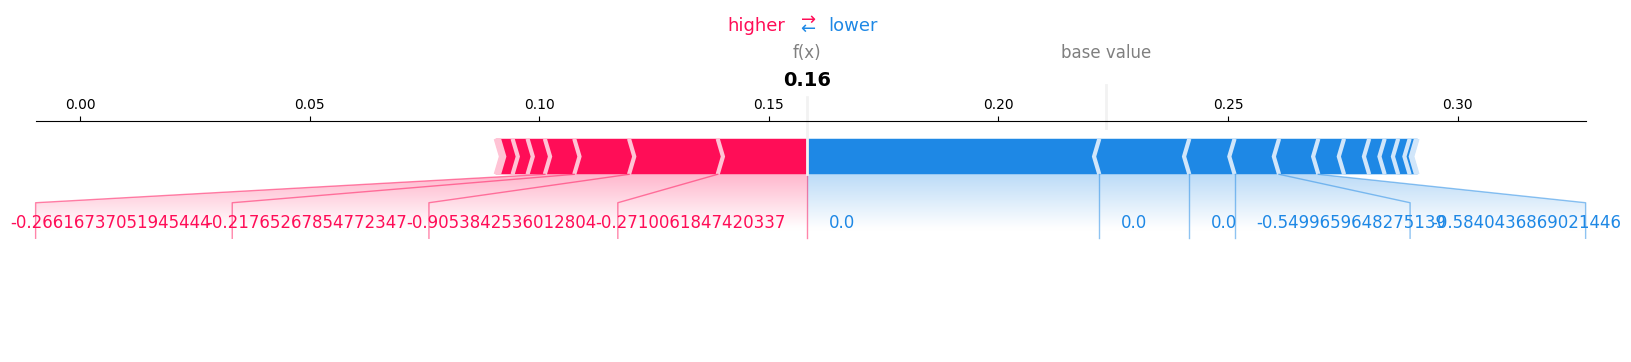

In [156]:

shap.force_plot(
    rf_explainer.expected_value[1],
    test_rf_shap_values[ex_0_index, :, 1],
    X_test_transformed[ex_0_index, :],
    matplotlib=True,
)


In [161]:
pd.DataFrame(
    test_rf_shap_values[ex_1_index, :, 1],
    index = column_names,
    columns = ['SHAP values'],
)

,SHAP values
LIMIT_BAL,-0.000989
AGE,0.015401
BILL_AMT1,-0.010761
BILL_AMT2,-0.005284
BILL_AMT3,-0.009267
BILL_AMT4,0.005993
BILL_AMT5,0.000950
BILL_AMT6,-0.014785
PAY_AMT1,0.017286
PAY_AMT2,-0.008198


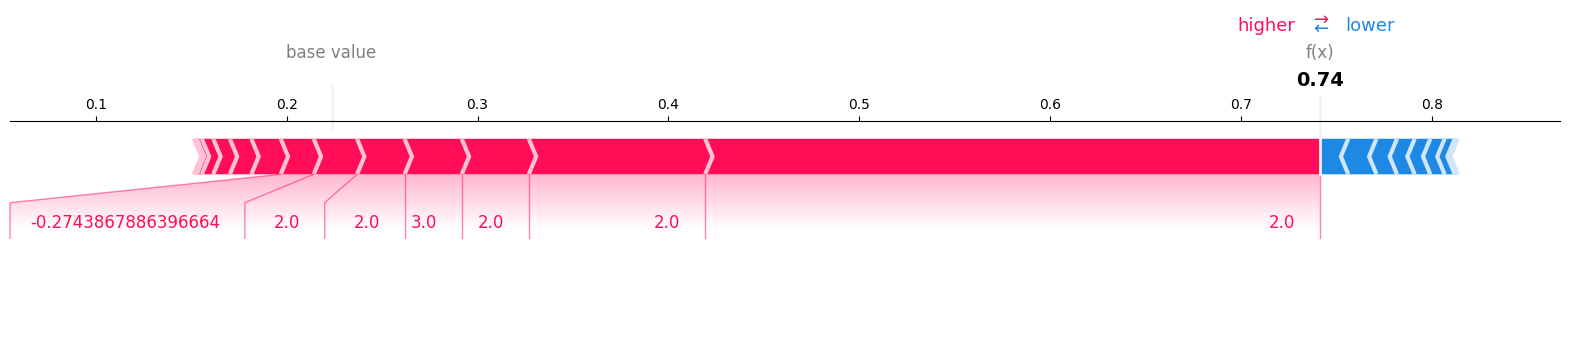

In [163]:

shap.force_plot(
    rf_explainer.expected_value[1],
    test_rf_shap_values[ex_1_index, :,1],
    X_test_transformed[ex_1_index, :],
    matplotlib=True,
)

The score is with respect to class 1, higher than the base value, base value is at 0.2, we can see most features pushing the prediction to higher value.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_Type your answer here, replacing this text._

In [70]:
results = {
    'Best Model': ['Random Forest'],
    'Optimized Hyperparameters': ['n_estimators = 21, max_depth = 13, max_features = 20'],
    'Validation Accuracy': [0.8164],
    'Validation Recall': [0.370],
    'Validation Precision': [0.6585],
    'Validation F1 Score': [0.4736],
    'Validation ROC-AUC': [0.7692],
    'Test Accuracy': [0.8163],
    'Test Precision': [0.6270],
    'Test Recall': [0.3737],
    'Test F1 Score': [0.4683],
    'Test ROC-AUC': [0.6561],
    'Most Important Feature': ['PAY_0'],
}
pd.DataFrame(results).T

,0
Best Model,Random Forest
Optimized Hyperparameters,"n_estimators = 21, max_depth = 13, max_feature..."
Validation Accuracy,0.8164
Validation Recall,0.37
Validation Precision,0.6585
Validation F1 Score,0.4736
Validation ROC-AUC,0.7692
Test Accuracy,0.8163
Test Precision,0.627
Test Recall,0.3737


**SUMMARY**

In this project, we explored various machine learning models to predict default payments using clients' personal information and payment history. We trained multiple models and compared key performance metrics such as accuracy, precision, recall, F1 score, and ROC-AUC to identify the best-performing model. Our results showed that the random forest model had the strongest overall performance and generalized well to unseen data. 

To further improve its performance, we fine-tuned its hyperparameters using random search. We also used SHAP values to analyze feature importance, revealing that recent payment history and age were the most influential factors in predicting defaults. 

While we achieved solid results, there are additional strategies that could enhance both performance and interpretability, such as feature engineering, adjusting class weights to handle class imbalance, experimenting with other ML models for comparison, and more.

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

One of the biggest takeaways from the supervised machine learning material is how much data preprocessing and feature selection can impact a model’s performance. It’s easy to focus on choosing the "best" algorithm, like KNN, Random Forest, or Linear Regression, but I’ve realized that the quality of the input data often matters just as much—if not more—than the model itself. Cleaning the data, handling missing values, scaling features, and picking the right ones can make a huge difference. I also found hyperparameter optimization really interesting because small tweaks can drastically change how well a model performs. Overall, this material has shown me that building a good machine learning model isn’t just about picking an algorithm—it’s about understanding the data and fine-tuning every step of the process.

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)